# HW \#1 Coordinate Descent
### 제출기한: 2024.03.20

다음 함수의 최소값을 Coordinate Descent 방법을 이용하여 찾으시오.

$g(w_1, w_2)=0.26 (w_1^2 + w_2^2) - 0.48 w_1 w_2$

제출물:
1. 코드와 결과가 표시된 쥬피터 화일 제출 
2. contour plot에 해를 찾아가는 과정을 표시하시오 (예제 참조) 
2. cost function history plot를 그리시오 (예제 참조)

주의사항:
1. 예제를 실행하기 위해서는 첨부한 Libraries.zip를 unzip하고 하위 디렉토리에서 이 노트북을 실행시켜야 함.

In [1]:
# imports from custom library
import sys
sys.path.append('../')

import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import math_optimization_library as optlib

# import demos for this notebook
static_plotter = optlib.static_plotter.Visualizer();

ModuleNotFoundError: No module named 'autograd'

## HW: zero-order coordinate descent 알고리즘 구현 

In [7]:
import numpy as np

def coordinate_descent(g, max_its, w):
    directions_plus = np.eye(np.size(w), np.size(w))
    directions_minus = -np.eye(np.size(w), np.size(w))
    all_directions = np.concatenate((directions_plus, directions_minus), axis=0)
    
    weight_history = [np.copy(w)]  # 초기 가중치 저장
    cost_history = [g(w)]          # 초기 비용 저장
    alpha = 0.25
    prev_ind = None

    for k in range(max_its):
        # 현재 가중치와 비용 기록
        weight_history.append(w)
        cost_history.append(g(w))
        
        # 이전에 선택된 방향과 그 반대 방향을 제외한 방향에서 후보지점들을 평가
        best_eval = float('inf')
        best_direction = None
        for i, d in enumerate(all_directions):
            # 이전 방향과 그 반대 방향은 제외
            if prev_ind is not None and (i == prev_ind or i == (prev_ind + np.size(w)) % (2 * np.size(w))):
                continue

            # 새로운 후보 지점 평가
            w_candidate = w + alpha*d
            eval_candidate = g(w_candidate)

            # 최소 비용 갱신
            if eval_candidate < best_eval:
                best_eval = eval_candidate
                best_direction = d
                next_ind = i
        
        w = w + alpha*best_direction
        prev_ind = next_ind  # 다음 반복을 위해 이번에 사용된 방향 기록

        # 결과 기록
        weight_history.append(w)
        cost_history.append(best_eval)
        

    return weight_history, cost_history

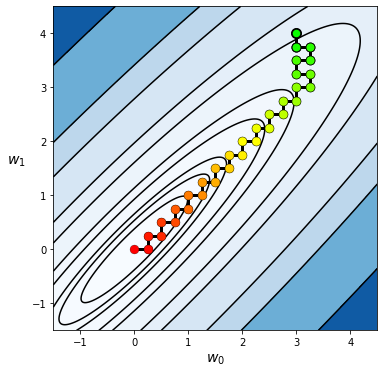

In [14]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run coordinate search algorithm 
w = np.array([3,4]); max_its = 32;
weight_history_1,cost_history_1 = coordinate_descent(g, max_its, w)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_contour_plot(g,weight_history_1,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 25,show_original = False)

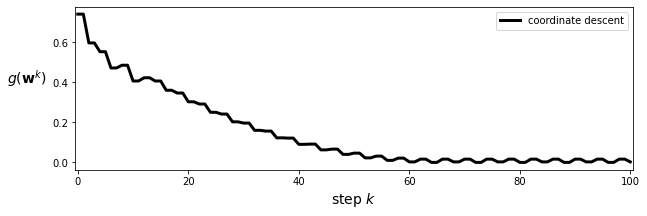

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1],start = 0,points = False,labels = ['coordinate descent'])